In [ ]:
import tensorflow as tf
import zipfile

!wget http://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-25 20:10:57--  http://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   263MB/s    in 0.4s    

2022-05-25 20:10:57 (263 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder +"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(random_image[0])
  print(f"Image shape :{img.shape}")
  return img

3066951.jpg
Image shape :(512, 512, 3)


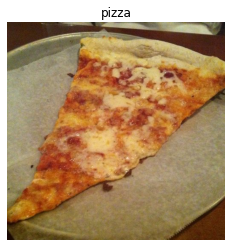

In [ ]:
img = view_random_image("pizza_steak/train", "pizza")

In [ ]:
img=tf.constant(img)
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[55, 32, 14],
        [57, 34, 16],
        [62, 39, 21],
        ...,
        [26, 24, 27],
        [20, 20, 22],
        [12, 12, 14]],

       [[52, 29, 11],
        [54, 31, 13],
        [56, 33, 15],
        ...,
        [27, 25, 28],
        [22, 20, 23],
        [18, 18, 20]],

       [[58, 36, 15],
        [58, 36, 15],
        [58, 36, 15],
        ...,
        [25, 23, 24],
        [23, 21, 24],
        [23, 23, 25]],

       ...,

       [[28,  9,  2],
        [30, 11,  5],
        [29, 10,  4],
        ...,
        [74, 33,  5],
        [81, 40, 12],
        [82, 41, 13]],

       [[29, 10,  3],
        [31, 12,  5],
        [30, 11,  4],
        ...,
        [70, 29,  0],
        [75, 34,  4],
        [70, 29,  1]],

       [[30, 11,  4],
        [32, 13,  6],
        [32, 13,  6],
        ...,
        [81, 40, 10],
        [86, 45, 15],
        [78, 37,  7]]], dtype=uint8)>

In [ ]:
tf.cast(img, dtype=tf.float32)/255.

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.21568628, 0.1254902 , 0.05490196],
        [0.22352941, 0.13333334, 0.0627451 ],
        [0.24313726, 0.15294118, 0.08235294],
        ...,
        [0.10196079, 0.09411765, 0.10588235],
        [0.07843138, 0.07843138, 0.08627451],
        [0.04705882, 0.04705882, 0.05490196]],

       [[0.20392157, 0.11372549, 0.04313726],
        [0.21176471, 0.12156863, 0.05098039],
        [0.21960784, 0.12941177, 0.05882353],
        ...,
        [0.10588235, 0.09803922, 0.10980392],
        [0.08627451, 0.07843138, 0.09019608],
        [0.07058824, 0.07058824, 0.07843138]],

       [[0.22745098, 0.14117648, 0.05882353],
        [0.22745098, 0.14117648, 0.05882353],
        [0.22745098, 0.14117648, 0.05882353],
        ...,
        [0.09803922, 0.09019608, 0.09411765],
        [0.09019608, 0.08235294, 0.09411765],
        [0.09019608, 0.09019608, 0.09803922]],

       ...,

       [[0.10980392, 0.03529412, 0.00784314],
        [0.11

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")                         
])
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.fit(train_data,
            
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 209ms/step - loss: 0.5734 - accuracy: 0.7120 - val_loss: 0.4285 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4289 - accuracy: 0.8033 - val_loss: 0.3464 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4097 - accuracy: 0.8180 - val_loss: 0.3752 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3773 - accuracy: 0.8440 - val_loss: 0.3409 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3675 - accuracy: 0.8413 - val_loss: 0.3299 - val_accuracy: 0.8680


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 249ms/step - loss: 5.0935 - accuracy: 0.6053 - val_loss: 1.3302 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 12s 253ms/step - loss: 0.8138 - accuracy: 0.7060 - val_loss: 0.6648 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.5482 - accuracy: 0.7413 - val_loss: 0.5058 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5409 - accuracy: 0.7533 - val_loss: 0.7022 - val_accuracy: 0.6600
Epoch 5/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4918 - accuracy: 0.7820 - val_loss: 0.5679 - val_accuracy: 0.7040


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


2173084.jpg
Image shape :(512, 512, 3)
1898723.jpg
Image shape :(384, 512, 3)


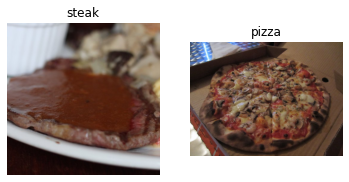

In [ ]:
 plt.figure()
 plt.subplot(1,2,1)
 steak_img = view_random_image("pizza_steak/train/", "steak")
 plt.subplot(1,2,2)
 pizza_img= view_random_image("pizza_steak/train/", "pizza")

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels=train_data.next()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224,3)
                             ),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics="accuracy")



In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 272ms/step - loss: 1.1558 - accuracy: 0.6793 - val_loss: 0.4406 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 12s 266ms/step - loss: 0.4376 - accuracy: 0.8107 - val_loss: 0.4019 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.3196 - accuracy: 0.8740 - val_loss: 0.3622 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2409 - accuracy: 0.9093 - val_loss: 0.3795 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.1000 - accuracy: 0.9720 - val_loss: 0.4131 - val_accuracy: 0.8320


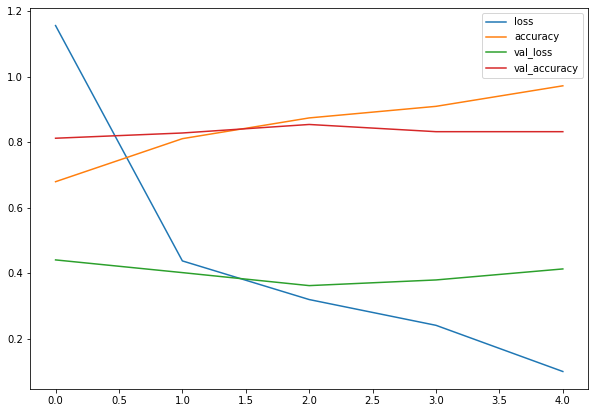

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))
  

  plt.plot(epochs,loss, label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy, label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

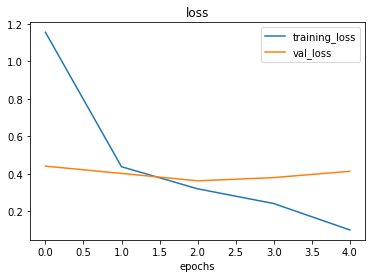

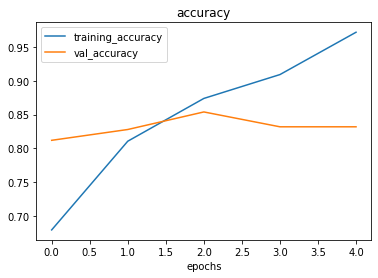

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
                      Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 365ms/step - loss: 0.6107 - accuracy: 0.6507 - val_loss: 0.4485 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4537 - accuracy: 0.8007 - val_loss: 0.4162 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4217 - accuracy: 0.8180 - val_loss: 0.4078 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4029 - accuracy: 0.8253 - val_loss: 0.3411 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3756 - accuracy: 0.8280 - val_loss: 0.3224 - val_accuracy: 0.8800


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

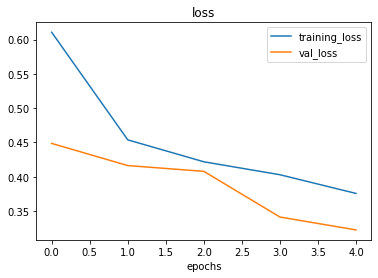

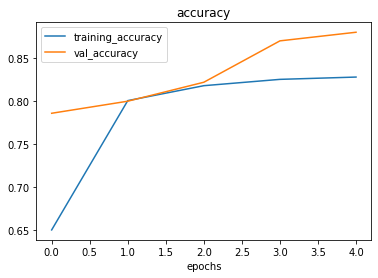

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [ ]:
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)

Augmented training data:
Found 1500 images belonging to 2 classes.


In [ ]:
print("Non-augmented train data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Non-augmented train data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next()

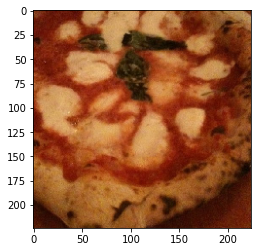

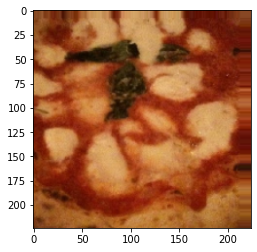

In [ ]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.figure()
plt.imshow(augmented_images[random_number])

In [ ]:
model_6 = Sequential([
                      Conv2D(10,3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 628ms/step - loss: 0.7798 - accuracy: 0.4740 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6954 - accuracy: 0.4880 - val_loss: 0.6841 - val_accuracy: 0.5780
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6989 - accuracy: 0.5187 - val_loss: 0.6738 - val_accuracy: 0.6180
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6877 - accuracy: 0.5327 - val_loss: 0.6333 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6689 - accuracy: 0.5833 - val_loss: 0.6524 - val_accuracy: 0.6300


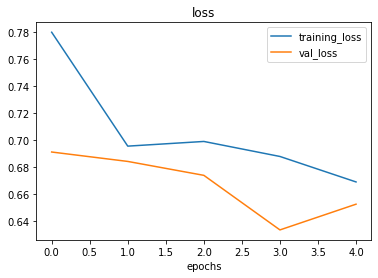

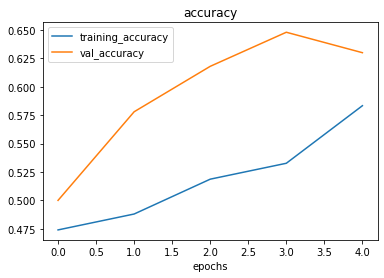

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         batch_size=32,
                                                                         class_mode="binary",
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")

])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7= model_7.fit(train_data_augmented_shuffled,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6183 - accuracy: 0.6533 - val_loss: 0.4747 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 28s 608ms/step - loss: 0.5174 - accuracy: 0.7513 - val_loss: 0.4246 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 26s 556ms/step - loss: 0.5103 - accuracy: 0.7413 - val_loss: 0.4179 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4688 - accuracy: 0.7773 - val_loss: 0.3938 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4525 - accuracy: 0.7880 - val_loss: 0.3853 - val_accuracy: 0.8300


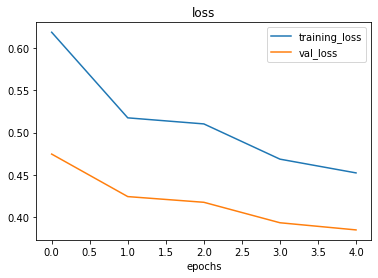

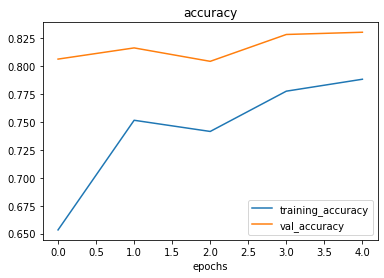

In [ ]:
plot_loss_curves(history_7)

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-05-25 20:20:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2022-05-25 20:20:48 (34.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

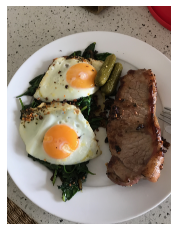

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak= mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img =tf.io.read_file(filename)
  img =tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
steak= load_and_prep_image("03-steak.jpeg")

In [ ]:
pred=model_7.predict(tf.expand_dims(steak, axis=0))

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  print(pred)
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

[[0.93638396]]


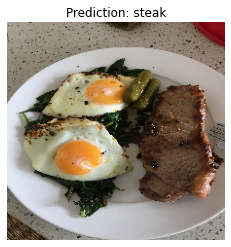

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-05-25 20:20:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-05-25 20:20:51 (40.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



[[0.62013334]]


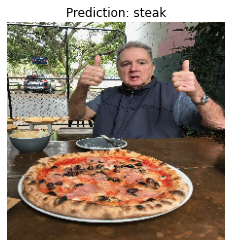

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [ ]:
#multi

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2022-05-25 20:22:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  65.3MB/s    in 6.4s    

2022-05-25 20:22:14 (77.3 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


867726.jpg
Image shape :(512, 512, 3)


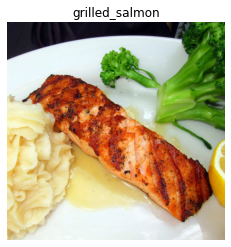

In [ ]:
import random
img = view_random_image(target_dir= train_dir,
                        target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")


test_data  = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
len(train_data)

235

In [ ]:
model_8 = Sequential([
                      Conv2D(10,3 ,input_shape=(224,224, 3)),
                      Activation(activation="relu"),
                      Conv2D(10,3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.1633 - accuracy: 0.2044 - val_loss: 1.9904 - val_accuracy: 0.2944
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8949 - accuracy: 0.3391 - val_loss: 1.8958 - val_accuracy: 0.3252
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.5748 - accuracy: 0.4685 - val_loss: 1.9907 - val_accuracy: 0.3248
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 1.0684 - accuracy: 0.6483 - val_loss: 2.3476 - val_accuracy: 0.3140
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.4985 - accuracy: 0.8403 - val_loss: 3.1600 - val_accuracy: 0.2900


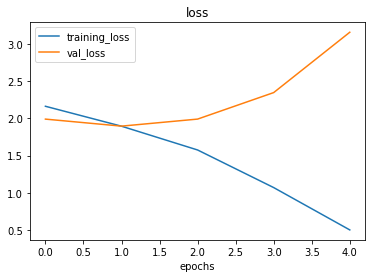

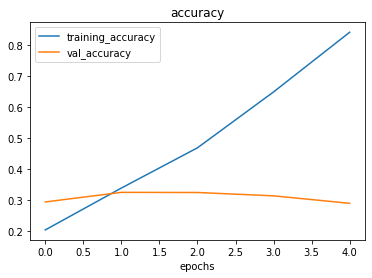

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
model_9 = Sequential([
                      Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 229ms/step - loss: 2.1684 - accuracy: 0.2413 - val_loss: 1.9465 - val_accuracy: 0.3232
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.8012 - accuracy: 0.3851 - val_loss: 1.9617 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.4625 - accuracy: 0.5212 - val_loss: 2.0476 - val_accuracy: 0.3016
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.9778 - accuracy: 0.6933 - val_loss: 2.2249 - val_accuracy: 0.3140
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.5594 - accuracy: 0.8375 - val_loss: 2.5839 - val_accuracy: 0.3100


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fce0e19ae50>>

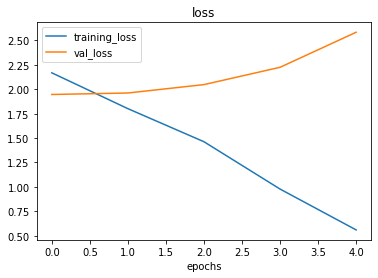

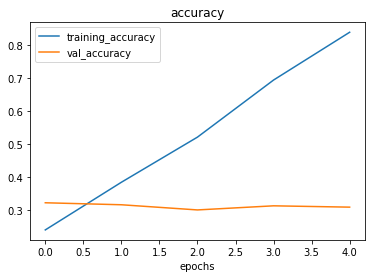

In [ ]:
plot_loss_curves(history_9)

model_9.summary()

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

In [ ]:

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10= tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 540ms/step - loss: 2.2362 - accuracy: 0.1649 - val_loss: 2.1361 - val_accuracy: 0.2160
Epoch 2/5
235/235 [==============================] - 111s 474ms/step - loss: 2.1485 - accuracy: 0.2147 - val_loss: 2.0412 - val_accuracy: 0.2520
Epoch 3/5
235/235 [==============================] - 112s 476ms/step - loss: 2.1130 - accuracy: 0.2275 - val_loss: 2.0241 - val_accuracy: 0.2592
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0686 - accuracy: 0.2587 - val_loss: 1.9204 - val_accuracy: 0.3060
Epoch 5/5
235/235 [==============================] - 111s 470ms/step - loss: 2.0261 - accuracy: 0.2889 - val_loss: 1.8941 - val_accuracy: 0.3488


In [ ]:
model_10.evaluate()

ValueError: ignored

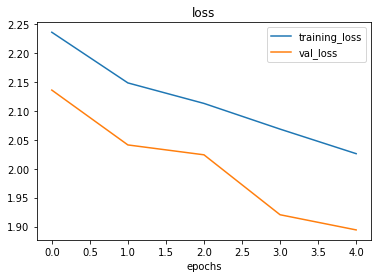

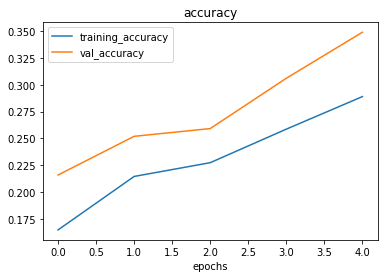

In [ ]:
plot_loss_curves(history_10)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-05-25 21:29:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.05s   

2022-05-25 21:29:08 (30.4 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-05-25 21:29:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0] >1 ):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  
  print(pred)
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

[[0.03339494 0.10067441 0.04654096 0.05304646 0.09890409 0.06285867
  0.12879223 0.08711433 0.17825796 0.21041602]]


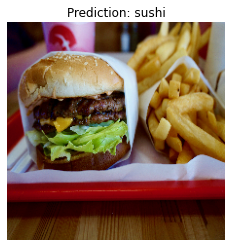

In [ ]:
pred_and_plot(model_10,
              "03-hamburger.jpeg",
              class_names = class_names)

In [ ]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 1.8941 - accuracy: 0.3488


[1.8941445350646973, 0.34880000352859497]